In [48]:
'''CLASSIFY LARGE IMAGES USING INCEPTION_V3'''

from tensorflow.keras.layers import Input, Dense, Flatten # CNN lAYERS
import keras #IMPORTING KERAS (TENSORFLOW BACKEND)
from tensorflow.keras.models import Model # IMPORTING KERAS MODEL
from keras.applications.inception_v3 import InceptionV3 # IMPORTING INCEPTION MODEL FROM KERAS
from tensorflow.keras.optimizers import SGD, Adam # GRADIENT DESCENT METHODS
from tensorflow.keras.preprocessing import image # PREPROSESS IMAGES
from tensorflow.keras.preprocessing.image import ImageDataGenerator #IMAGE AUGMENTATION
from keras.preprocessing.image import ImageDataGenerator 
from glob import glob # TO GET DATA FROM PC
import numpy as np # NUMPY PYTHON LIBRARY FOR ARRAYS AND MATRICS
import pandas as pd # PANDAS LIBRARY FOR DATA MANUPULATION
import matplotlib.pyplot as plt # FOR PLOTTING

In [49]:
# NAMEING DATA (TRAINING AND TESTING) 
training_set1 = 'Dataset/training_set_3'# CONTAIN 5 CLASS WITH 968 IMAGES
test_set1 = 'Dataset/testing_set_3' # CONTAIN 5 CLASS WITH 290 IMAGES

'''CLASSES ARE - [ELEPHANT, DOG, CAT, HORSE, BEAR]'''

'CLASSES ARE - [ELEPHANT, DOG, CAT, HORSE, BEAR]'

In [50]:

rescale = 1./255.0 # TO SCALE IMAGE TO SAME SIZE 
target_size = (299, 299) # IMAGE DIMENTION
batch_size = 32 
class_mode = 'categorical' # DATA TYPE

'''IMAGE AUGMENTATION artificially expand the size of a training dataset 
by creating modified versions of images in the dataset. 
also improve the performance and ability of the model to generalize.'''

train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=rescale
)

#GETTING TRAINING DATA
train_generator = train_datagen.flow_from_directory(
    training_set1,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size
)


#GETTING TESTING DATA
test_datagen = ImageDataGenerator(rescale=rescale)
test_generator = test_datagen.flow_from_directory(
    test_set1,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=1
)


Found 968 images belonging to 5 classes.
Found 290 images belonging to 5 classes.


In [52]:
'''I have add output layers to inception_v3 model to classify the classes, Output 
layer is CNN layer having output_dim(neurons) = 5 as number of classes are five. 
activation function use is softmax to classify classes'''


base_model = InceptionV3(weights='imagenet', include_top=False) 
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(5, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False
  
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_847 (Conv2D)             (None, None, None, 3 864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_856 (BatchN (None, None, None, 3 96          conv2d_847[0][0]                 
__________________________________________________________________________________________________
activation_847 (Activation)     (None, None, None, 3 0           batch_normalization_856[0][0]    
___________________________________________________________________________________________

In [53]:
#MODEL COMPILATION WITH GRADIENT DESCENT OPTIMIZER
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [54]:
#MODEL FITTING WITH 10 EPOCHS
Model = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=10,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator)
) 

Epoch 1/10
31/31 [==============================] - 577s 19s/step - loss: 0.2990 - accuracy: 0.9163 - val_loss: 0.0013 - val_accuracy: 0.7690
Epoch 2/10
31/31 [==============================] - 533s 17s/step - loss: 0.1319 - accuracy: 0.9669 - val_loss: 7.4741e-05 - val_accuracy: 0.8379
Epoch 3/10
31/31 [==============================] - 539s 17s/step - loss: 0.0479 - accuracy: 0.9886 - val_loss: 4.6416 - val_accuracy: 0.8759
Epoch 4/10
31/31 [==============================] - 504s 16s/step - loss: 0.1473 - accuracy: 0.9700 - val_loss: 0.0683 - val_accuracy: 0.7552
Epoch 5/10
31/31 [==============================] - 275s 9s/step - loss: 0.0807 - accuracy: 0.9773 - val_loss: 7.0023e-04 - val_accuracy: 0.8586
Epoch 6/10
31/31 [==============================] - 289s 9s/step - loss: 0.0214 - accuracy: 0.9907 - val_loss: 0.0771 - val_accuracy: 0.9138
Epoch 7/10
31/31 [==============================] - 286s 9s/step - loss: 0.0374 - accuracy: 0.9876 - val_loss: 0.0971 - val_accuracy: 0.9345
E

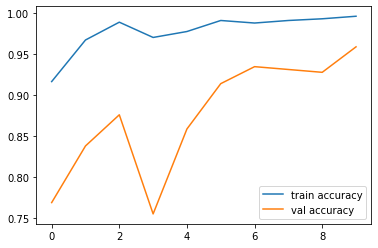

<Figure size 432x288 with 0 Axes>

In [55]:
plt.plot(Model.history['accuracy'], label='train accuracy')
plt.plot(Model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show() 
plt.savefig('AccVal_acc') 

In [ ]:
'''
From the above obesevation, we can see that the model perform pretty well, 
but for predicting seprate images along with probability, i am not using the 
model i trained to classify images (INCEPTION_V3 + OUTPUT LAYER)
'''

'''
I prefer to use plane predefine transfer learning Inception_V3 model without
any output layer to print top five predictions of animals along with probabilties 
'''

'''
Reason of doing so is,Transfer learning models has already trained on more
than million images and perform well on animal images directly. Another reason 
is its time efficient and easy to implement.
'''

"STEPS"

'''
1. IMPORT INCEPTION_V3 MODEL  
2. LOAD OUR IAMGE
3. CONVERT IMAGE INTO ARRAY TO PROCESS
4. APPLY IMAGE TO MODEL AND PREDICT
5. PRINT RESULT (TOP 5 PREDICTION + PROBABILITIES)

'''

In [ ]:
from keras.applications.inception_v3 import InceptionV3 
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input, decode_predictions
import numpy as np

In [4]:
model = InceptionV3(weights='imagenet')  
img_path = 'dataset/african-elephant-bull.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])


Predicted: [('n02504458', 'African_elephant', 0.667814), ('n01871265', 'tusker', 0.24733664), ('n02504013', 'Indian_elephant', 0.02276934), ('n02391049', 'zebra', 0.00032032427), ('n06785654', 'crossword_puzzle', 0.00031294647)]


In [ ]:
'''OUTPUT = Predicted: [('n02504458', 'African_elephant', 0.667814), 
                        ('n01871265', 'tusker', 0.24733664), 
                        ('n02504013', 'Indian_elephant', 0.02276934), 
                        ('n02391049', 'zebra', 0.00032032427), 
                        ('n06785654', 'crossword_puzzle', 0.00031294647)]'''

In [62]:
model = InceptionV3(weights='imagenet')
img_path = 'dataset/bear.jfif'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])


Predicted: [('n02132136', 'brown_bear', 0.91376525), ('n02134084', 'ice_bear', 0.004742638), ('n02133161', 'American_black_bear', 0.0027516417), ('n02134418', 'sloth_bear', 0.0016795425), ('n02509815', 'lesser_panda', 0.00084043824)]


In [ ]:
'''OUTPUT = Predicted: [('n02132136', 'brown_bear', 0.91376525), 
                        ('n02134084', 'ice_bear', 0.004742638), 
                        ('n02133161', 'American_black_bear', 0.0027516417), 
                        ('n02134418', 'sloth_bear', 0.0016795425), 
                        ('n02509815', 'lesser_panda', 0.00084043824)]'''

In [25]:
model = InceptionV3(weights='imagenet')
img_path = 'dataset/cat.jfif'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n02124075', 'Egyptian_cat', 0.1792791), ('n02123159', 'tiger_cat', 0.10164206), ('n02119789', 'kit_fox', 0.10109707), ('n02120505', 'grey_fox', 0.03599684), ('n02441942', 'weasel', 0.02470384)]


In [ ]:
'''OUTPUT = Predicted: [('n02124075', 'Egyptian_cat', 0.1792791), 
                        ('n02123159', 'tiger_cat', 0.10164206), 
                        ('n02119789', 'kit_fox', 0.10109707), 
                        ('n02120505', 'grey_fox', 0.03599684), 
                        ('n02441942', 'weasel', 0.02470384)] '''

In [60]:
model = InceptionV3(weights='imagenet')
img_path = 'dataset/horse2.jfif'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n02389026', 'sorrel', 0.6646272), ('n02091831', 'Saluki', 0.02213537), ('n02090622', 'borzoi', 0.01156344), ('n02088094', 'Afghan_hound', 0.011399593), ('n02105056', 'groenendael', 0.0071893283)]


In [ ]:
'''OUTPUT = Predicted: [('n02389026', 'sorrel', 0.6646272), 
                        ('n02091831', 'Saluki', 0.02213537), 
                        ('n02090622', 'borzoi', 0.01156344), 
                        ('n02088094', 'Afghan_hound', 0.011399593), 
                        ('n02105056', 'groenendael', 0.0071893283)]'''

In [61]:
model = InceptionV3(weights='imagenet')
img_path = 'dataset/dog.jfif'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n02099712', 'Labrador_retriever', 0.9466795), ('n02099601', 'golden_retriever', 0.015148135), ('n02089973', 'English_foxhound', 0.004192823), ('n02104029', 'kuvasz', 0.001829573), ('n02087046', 'toy_terrier', 0.0017655585)]


In [ ]:
'''OUTPUT = Predicted: [('n02099712', 'Labrador_retriever', 0.9466795), 
                        ('n02099601', 'golden_retriever', 0.015148135), 
                        ('n02089973', 'English_foxhound', 0.004192823), 
                        ('n02104029', 'kuvasz', 0.001829573), 
                        ('n02087046', 'toy_terrier', 0.0017655585)] '''
#LABRADOR_RETRIEVER IS DOG BREED

In [ ]:
'''
OBSERVATION - 
Inception_v3 model perform great for dog, cat, elephant, bear and does not perform
good for horse.

'''